In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme("notebook")
sns.set_style("whitegrid")

In [3]:
cursor = sqlite3.connect("/content/data_base.db")

In [7]:
#We might want to know which tables are in our database.

query_tables = cursor.execute(
    """
    SELECT name
    FROM sqlite_master
    WHERE type="table" AND name != "sqlite_sequence"
    """
)

result_query_tables = query_tables.fetchall()
data_frame_tables = pd.DataFrame(result_query_tables, columns=["Tables"])
data_frame_tables

,Tables
0,department
1,employee


(0) Query about how many employees are in each department.

In [4]:
query_0 = cursor.execute(
    """
    SELECT department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    GROUP BY department.name
    """
)

result_query_0 = query_0.fetchall()
data_frame_0 = pd.DataFrame(result_query_0, columns=["Department", "Number of employees"])
data_frame_0

#cursor.close()

,Department,Number of employees
0,Accounting,3
1,Data analytics,3
2,Human Resources,2
3,IT,2
4,Management,8
5,Marketing,3
6,Procurement,2
7,Sales,5


In [ ]:
#Let's make a more interested query about how many employees are for each department, considering employees over than 25 years old.

query_0_1 = cursor.execute(
    """
    SELECT department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE age > 25
    GROUP BY department.name
    """
)

result_query_0_1 = query_0_1.fetchall()
data_frame_0_1 = pd.DataFrame(result_query_0_1, columns=["Department", "Employees over 25"])
data_frame_0_1

#cursor.close()

,Department,Employees over 25
0,Accounting,2
1,Data analytics,1
2,Human Resources,1
3,IT,1
4,Management,8
5,Marketing,1
6,Procurement,2
7,Sales,4


In [15]:
#It would be important to know how many analysts (regular and junior) are for each department.

#First the list of departments and the positions:

query_0_2 = cursor.execute(
    """
    SELECT department.name, position
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE position LIKE "%Analyst%"
    """
)

result_query_0_2 = query_0_2.fetchall()
data_frame_0_2 = pd.DataFrame(result_query_0_2, columns=["Department", "Position"])
data_frame_0_2

#cursor.close()

,Department,Position
0,Human Resources,Analyst
1,Human Resources,Analyst Jr.
2,IT,Analyst
3,IT,Analyst Jr
4,Marketing,Analyst
5,Marketing,Analyst
6,Marketing,Analyst
7,Data analytics,Analyst Jr.
8,Data analytics,Analyst Jr.
9,Data analytics,Analyst


In [17]:
#Then, how many analysts are in each department:

query_0_3 = cursor.execute(
    """
    WITH Analyst AS(
      SELECT department.name AS department_name, position
      FROM employee
      INNER JOIN department ON department_code = department.code
      WHERE position LIKE "%Analyst%"
    )
    SELECT Analyst.department_name, COUNT(1) AS num_employees
    FROM Analyst
    GROUP BY Analyst.department_name
    """
)

result_query_0_3 = query_0_3.fetchall()
data_frame_0_3 = pd.DataFrame(result_query_0_3, columns=["Department", "Number of Employees"])
data_frame_0_3

,Department,Number of Employees
0,Accounting,3
1,Data analytics,3
2,Human Resources,2
3,IT,2
4,Marketing,3
5,Procurement,2


(1) Query about how many departments are in each sector.

In [ ]:
query_1 = cursor.execute(
    """
    SELECT location, COUNT(1)
    FROM department
    GROUP BY location
    """
)

result_query_1 = query_1.fetchall()

for loc, dep in result_query_1:
  if dep > 1:
    print(f"The sector {loc} has {dep} departments.")
  else:
    print(f"The sector {loc} has {dep} department.")

#cursor.close()

The sector A has 4 departments.
The sector B has 3 departments.
The sector C has 1 department.


(2) Query about time in the company.

In [ ]:
#how many employees have 10 or more year in the company.

query_2 = cursor.execute(
    """
    SELECT COUNT(1)
    FROM employee
    WHERE time_in_company >= 10
    """
)

result_query_2 = query_2.fetchone()
print(f"There are {result_query_2[0]} employees with 10 or more years in the company.")

#cursor.close()

There are 6 employees with 10 or more years in the company.


In [ ]:
#display the list of employees with 10 or more years in the company.

query_2_1 = cursor.execute(
    """
    SELECT name, time_in_company
    FROM employee
    WHERE time_in_company >=10
    """
)

result_query_2_1 = query_2_1.fetchall()
data_frame_2_1 = pd.DataFrame(result_query_2_1, columns=["Employee", "Years in company"])
data_frame_2_1

#cursor.close()

,Employee,Years in company
0,Brenda Jimenez,10
1,Paola Lee,12
2,Noemi Guzmán,17
3,Johanan Hernández,11
4,Leonel Tiño,21
5,Rodolfo Estrada,20


In [ ]:
#group the employees who have 10 or more years by department.

query_2_2 = cursor.execute(
    """
    SELECT department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE time_in_company >= 10
    GROUP BY department.name
    """
)

result_query_2_2 = query_2_2.fetchall()
data_frame_2_2 = pd.DataFrame(result_query_2_2, columns=["Department", "Number of Employees"])
data_frame_2_2


#cursor.close()

,Department,Number of Employees
0,Management,5
1,Sales,1


(3) Query about level education of employees for each department.

In [ ]:
query_3 = cursor.execute(
    """
    SELECT education, department.name, COUNT(1)
    FROM employee
    INNER JOIN department ON department_code = department.code
    GROUP BY education, department.name
    """
)

result_query_3 = query_3.fetchall()

data_frame_3 = pd.DataFrame(result_query_3, columns= ["Education level", "Department", "Number of Employees"])
data_frame_3

#cursor.close()

,Education level,Department,Number of Employees
0,Bachelor's degree,Accounting,2
1,Bachelor's degree,Data analytics,2
2,Bachelor's degree,Human Resources,1
3,Bachelor's degree,IT,1
4,Bachelor's degree,Management,2
5,Bachelor's degree,Marketing,1
6,Bachelor's degree,Procurement,2
7,Bachelor's degree,Sales,5
8,High School,Accounting,1
9,High School,Data analytics,1


(4) Query about employees who earn more than 10K and its relation with other variable.

In [ ]:
#Salary over 10K vs department.

query_4 = cursor.execute(
    """
    SELECT employee.name, department.name, salary
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE salary > 10000
    GROUP BY employee.name, department.name, salary
    """
)

result_query_4 = query_4.fetchall()
data_frame_4 = pd.DataFrame(result_query_4, columns=["Employee", "Department", "Salary"])
data_frame_4

#cursor.close()

,Employee,Department,Salary
0,Brenda Jimenez,Sales,11000.0
1,Bruce Hernández,Management,20000.0
2,Fabiola Lee,Management,20500.0
3,Johanan Hernández,Management,20000.0
4,Leonel Tiño,Management,30500.0
5,Marcos Miranda,Management,31000.0
6,Noemi Guzmán,Management,35500.0
7,Paola Lee,Management,25500.0
8,Rodolfo Estrada,Management,40500.0


In [ ]:
#We might be interested in know how many employees are there for each deparment who earn more than 10K.

series_4 = data_frame_4['Department'].value_counts()
series_4

Management    8
Sales         1
Name: Department, dtype: int64

In [ ]:
#In the last chunck of code we used the pandas' function 'value_counts()' to know the number of employees for each
#department who earn more than 10K. But we can make the same thing using just SQL:

query_4_0 = cursor.execute(
    """
    WITH Those_who_earn_more_money AS(
      SELECT employee.name, department.name AS department_name, salary
      FROM employee
      INNER JOIN department ON department_code = department.code
      WHERE salary > 10000
      GROUP BY employee.name, department.name, salary
    )
    SELECT Those_who_earn_more_money.department_name, COUNT(1)
    FROM Those_who_earn_more_money
    GROUP BY Those_who_earn_more_money.department_name
    """
)

result_query_4_0 = query_4_0.fetchall()
data_frame_4_0 = pd.DataFrame(result_query_4_0, columns=["Department", "Number of employees"])
data_frame_4_0

,Department,Number of employees
0,Management,8
1,Sales,1


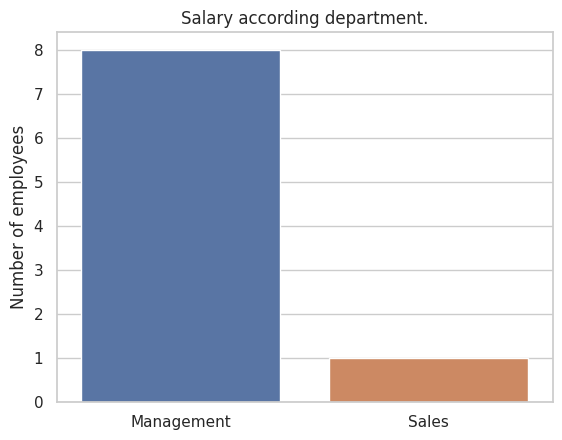

In [ ]:
department_names = series_4.index
department_values = series_4.values

ax_4 = sns.barplot(x=department_names, y=department_values)
ax_4.set_xticklabels(department_names)

plt.title("Salary according department.")
plt.ylabel("Number of employees")
plt.show()

In [ ]:
#Salary over 10K vs education level.

query_4_1 = cursor.execute(
    """
    SELECT name, education, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, education, salary
    """
)

result_query_4_1 = query_4_1.fetchall()
data_frame_4_1 = pd.DataFrame(result_query_4_1, columns=["Employee", "Education_level", "Salary"])
data_frame_4_1

#cursor.close()

,Employee,Education_level,Salary
0,Brenda Jimenez,Bachelor's degree,11000.0
1,Bruce Hernández,Bachelor's degree,20000.0
2,Fabiola Lee,Ph.D.,20500.0
3,Johanan Hernández,Ph.D.,20000.0
4,Leonel Tiño,Ph.D.,30500.0
5,Marcos Miranda,Bachelor's degree,31000.0
6,Noemi Guzmán,Ph.D.,35500.0
7,Paola Lee,Ph.D.,25500.0
8,Rodolfo Estrada,Ph.D.,40500.0


In [ ]:
#We also might be interested in know how many employees are there for each level education who earn more than 10K.

series_4_1 = data_frame_4_1['Education_level'].value_counts()
series_4_1

Ph.D.                6
Bachelor's degree    3
Name: Education_level, dtype: int64

In [ ]:
#Again, lets try to make it just with SQL:

query_4_0_1 = cursor.execute(
    """
    WITH Highest_educ_level AS(
      SELECT name, education, salary
      FROM employee
      WHERE salary > 10000
      GROUP BY name, education, salary
    )
    SELECT Highest_educ_level.education, COUNT(1)
    FROM Highest_educ_level
    GROUP BY Highest_educ_level.education
    """
)

result_query_4_0_1 = query_4_0_1.fetchall()
data_frame_4_0_1 = pd.DataFrame(result_query_4_0_1, columns=["Department", "Number of Employees"])
data_frame_4_0_1

,Department,Number of Employees
0,Bachelor's degree,3
1,Ph.D.,6


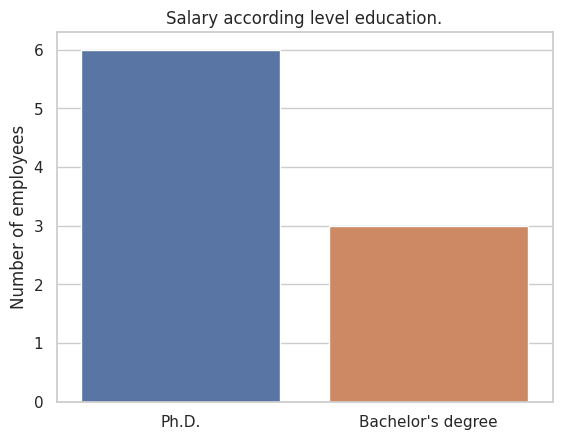

In [ ]:
level_educ_names = series_4_1.index
level_educ_values = series_4_1.values

ax_4_1 = sns.barplot(x=level_educ_names, y=level_educ_values)
ax_4_1.set_xticklabels(level_educ_names)

plt.title("Salary according level education.")
plt.ylabel("Number of employees")
plt.show()

In [ ]:
#Salary over 10K vs time in the company.

query_4_2 = cursor.execute(
    """
    SELECT name, time_in_company, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, time_in_company, salary
    """
)

result_query_4_2 = query_4_2.fetchall()
data_frame_4_2 = pd.DataFrame(result_query_4_2, columns=["Employee", "Time_in_the_company", "Salary"])
data_frame_4_2

#cursor.close()

,Employee,Time_in_the_company,Salary
0,Brenda Jimenez,10,11000.0
1,Bruce Hernández,9,20000.0
2,Fabiola Lee,6,20500.0
3,Johanan Hernández,11,20000.0
4,Leonel Tiño,21,30500.0
5,Marcos Miranda,5,31000.0
6,Noemi Guzmán,17,35500.0
7,Paola Lee,12,25500.0
8,Rodolfo Estrada,20,40500.0


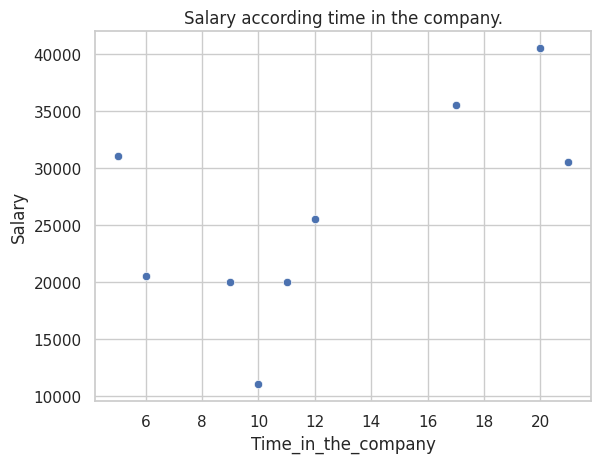

In [ ]:
#We probably want to know how is the correlation between salary and the time in the company

sns.scatterplot(x="Time_in_the_company", y="Salary", data=data_frame_4_2)
plt.title("Salary according time in the company.")
plt.show()

In [ ]:
corr_time_salary = data_frame_4_2['Time_in_the_company'].corr(data_frame_4_2['Salary'])
print(f"The correlation between time in the company vs salary is {corr_time_salary}")

The correlation between time in the company vs salary is 0.6022967377508008


In [ ]:
#Salary over 10K vs employee's age.

query_4_3 = cursor.execute(
    """
    SELECT name, age, salary
    FROM employee
    WHERE salary > 10000
    GROUP BY name, age, salary
    """
)

result_query_4_3 = query_4_3.fetchall()
data_frame_4_3 = pd.DataFrame(result_query_4_3, columns=["Employee", "Age", "Salary"])
data_frame_4_3

#cursor.close()

,Employee,Age,Salary
0,Brenda Jimenez,42,11000.0
1,Bruce Hernández,45,20000.0
2,Fabiola Lee,51,20500.0
3,Johanan Hernández,43,20000.0
4,Leonel Tiño,61,30500.0
5,Marcos Miranda,45,31000.0
6,Noemi Guzmán,50,35500.0
7,Paola Lee,53,25500.0
8,Rodolfo Estrada,65,40500.0


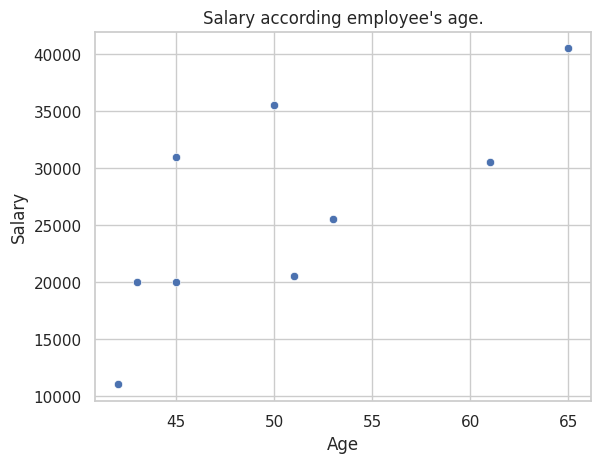

In [ ]:
sns.scatterplot(x="Age", y="Salary", data=data_frame_4_3)
plt.title("Salary according employee's age.")
plt.show()

In [ ]:
corr_age_salary = data_frame_4_3['Age'].corr(data_frame_4_3['Salary'])
print(f"The correlation between age vs salary is {corr_age_salary}")

The correlation between age vs salary is 0.7238485194989115


(5) Query about average salary per department with descendant order.

In [ ]:
query_5 = cursor.execute(
    """
    SELECT department.name, AVG(salary) AS average_salary
    FROM employee
    INNER JOIN department ON department_code = department.code
    GROUP BY department.name
    ORDER BY average_salary DESC
    """
)

result_query_5 = query_5.fetchall()
data_frame_5 = pd.DataFrame(result_query_5, columns=["Department", "Average Salary"])
data_frame_5

#cursor.close()

,Department,Average Salary
0,Management,27937.500000
1,Sales,9000.000000
2,Procurement,7500.000000
3,Accounting,7000.000000
4,IT,5250.000000
5,Data analytics,5166.666667
6,Human Resources,4500.000000
7,Marketing,4166.666667


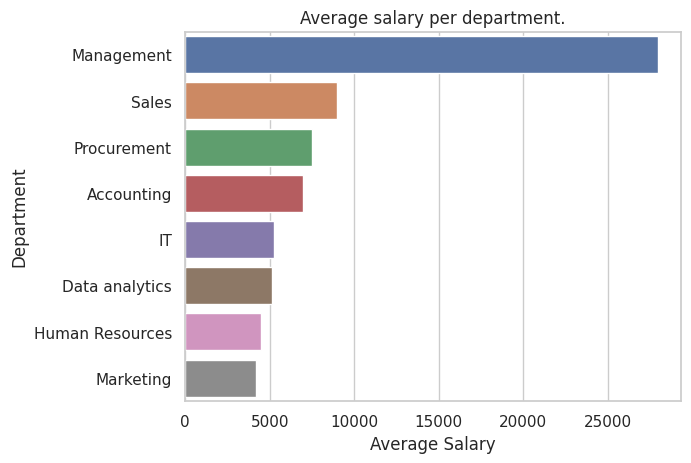

In [ ]:
sns.barplot(x="Average Salary", y="Department", data=data_frame_5)

plt.title("Average salary per department.")
plt.show()

(6) Query that displays which departments have more than 2 employees who earn more than 5K and have more than 2 years in the company.

In [ ]:
query_6 = cursor.execute(
    """
    SELECT department.name, COUNT(1) AS number_employees
    FROM employee
    INNER JOIN department ON department_code = department.code
    WHERE time_in_company > 2
    GROUP BY department.name
    HAVING COUNT(1) > 2
    ORDER BY number_employees DESC
    """
)

result_query_6 = query_6.fetchall()
data_frame_6 = pd.DataFrame(result_query_6, columns=["Department", "Number of employees"])
data_frame_6

,Department,Number of employees
0,Management,8
1,Sales,5
2,Data analytics,3
